In [1]:
from selenium import webdriver
from selenium.webdriver.common.by import By
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests as rq
import numpy as np
import time
import pickle
from io import BytesIO
from PIL import Image
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.action_chains import ActionChains
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from collections import Counter
import cv2
import itertools
import seaborn as sns
from nltk.corpus import wordnet
import nltk
nltk.download('wordnet')
from tqdm import tqdm
import warnings
warnings.filterwarnings("ignore")
import networkx as nx

[nltk_data] Downloading package wordnet to /home/pidoux/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [9]:
# Fonction pour calculer la similarité entre deux mots en utilisant WordNet
def wordnet_similarity(word1, word2):
    synsets1 = wordnet.synsets(word1)
    synsets2 = wordnet.synsets(word2)
    
    max_similarity = 0
    
    for synset1 in synsets1:
        for synset2 in synsets2:
            similarity = synset1.wup_similarity(synset2)  # Utilisation de la similarité de Wu-Palmer
            if similarity is not None and similarity > max_similarity:
                max_similarity = similarity
    
    return max_similarity

def matr_sim(word_list):
    similarity_matrix = np.zeros((len(word_list), len(word_list)))

    for i, word1 in enumerate(word_list):
        for j, word2 in enumerate(word_list):
            similarity = wordnet_similarity(word1, word2)
            similarity_matrix[i][j] = similarity

    # Utilisation de Seaborn pour créer une carte de chaleur
    sns.set(font_scale=1.2)
    plt.figure(figsize=(8, 6))
    sns.heatmap(similarity_matrix, annot=True, xticklabels=word_list, yticklabels=word_list, cmap="YlGnBu")
    plt.title("Matrice de Similarité entre les Mots")
    plt.show()
    return similarity_matrix

def hierarchie(liste_tag):
    dic ={}
    for tag in liste_tag:
        synsets = wordnet.synsets(tag)[0]
        if tag+'.n.01' not in dic:
            dic[tag+'.n.01'] = [hypo.name() for hypo in synsets.hyponyms()]
        else:
            dic[tag+'.n.01']+=([hypo.name() for hypo in synsets.hyponyms()])
    return dic

def graphe_hierarchie(liste_tag,dic_hierarchie,label =False):
    # Créez un graphe dirigé
    G = nx.DiGraph()

    # Ajoutez les arêtes au graphe en utilisant les données de tags
    for tag, parent_tags in dic_hierarchie.items():
        for p in parent_tags:
            G.add_edge(p, tag)
            for i in liste_tag:
                if i+'.n.01' == p:
                    G.add_edge(i, p)


    # Visualisation du graphe
    pos = nx.spring_layout(G)  # Positionnement des nœuds
    plt.figure(figsize=(10,10))
    nx.draw(G, pos, with_labels=label, node_size=1000, node_color="skyblue", font_size=18, arrows=True)
    plt.title("Hiérarchie des Tags")
    plt.show()

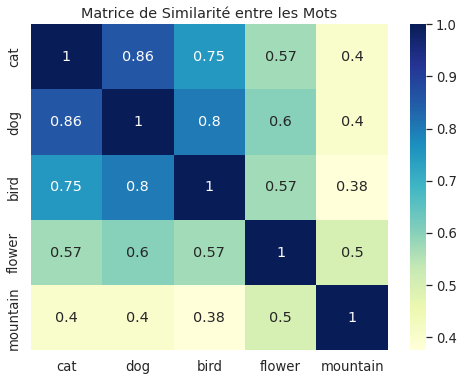

array([[1.        , 0.85714286, 0.75      , 0.57142857, 0.4       ],
       [0.85714286, 1.        , 0.8       , 0.6       , 0.4       ],
       [0.75      , 0.8       , 1.        , 0.57142857, 0.375     ],
       [0.57142857, 0.6       , 0.57142857, 1.        , 0.5       ],
       [0.4       , 0.4       , 0.375     , 0.5       , 1.        ]])

In [10]:
word_list = ["cat", "dog", "bird", "flower", "mountain"]

matr_sim(word_list)

{'cat.n.01': ['domestic_cat.n.01', 'wildcat.n.03'], 'dog.n.01': ['basenji.n.01', 'corgi.n.01', 'cur.n.01', 'dalmatian.n.02', 'great_pyrenees.n.01', 'griffon.n.02', 'hunting_dog.n.01', 'lapdog.n.01', 'leonberg.n.01', 'mexican_hairless.n.01', 'newfoundland.n.01', 'pooch.n.01', 'poodle.n.01', 'pug.n.01', 'puppy.n.01', 'spitz.n.01', 'toy_dog.n.01', 'working_dog.n.01'], 'bird.n.01': ['apodiform_bird.n.01', 'aquatic_bird.n.01', 'archaeopteryx.n.01', 'archaeornis.n.01', 'bird_of_passage.n.02', 'bird_of_prey.n.01', 'caprimulgiform_bird.n.01', 'carinate.n.01', 'cock.n.05', 'coraciiform_bird.n.01', 'cuculiform_bird.n.01', 'dickeybird.n.01', 'gallinaceous_bird.n.01', 'hen.n.02', 'ibero-mesornis.n.01', 'nester.n.02', 'night_bird.n.01', 'nonpasserine_bird.n.01', 'parrot.n.01', 'passerine.n.01', 'piciform_bird.n.01', 'protoavis.n.01', 'ratite.n.01', 'sinornis.n.01', 'trogon.n.01', 'twitterer.n.01'], 'flower.n.01': ['achimenes.n.01', 'african_daisy.n.01', 'african_daisy.n.02', 'african_daisy.n.03', '

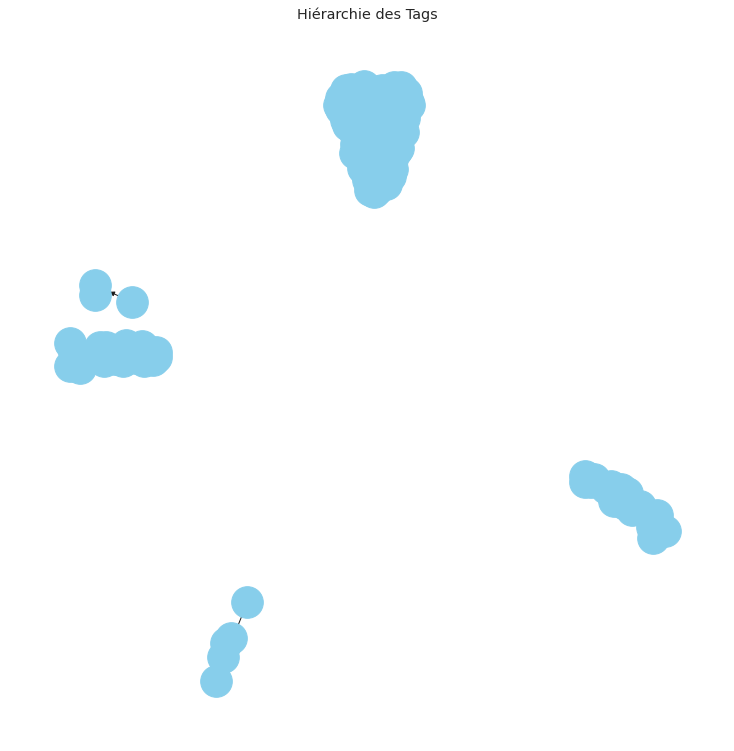

In [14]:
hierar = hierarchie(word_list)
print(hierar)
graphe_hierarchie(word_list,hierar,False)